# Advanced Computer Vision Topics

## Session 5: Image Segmentation (3 hours)

In [1]:
import os
import warnings
import random

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model
from sklearn.model_selection import train_test_split
from plot_layers import imshow
import segmentation_models as sm  # segmentation-models==1.0.1
sm.set_framework('tf.keras')
sm.framework()
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

warnings.simplefilter("ignore")
%matplotlib inline

Segmentation Models: using `keras` framework.


In [14]:
tf.__version__

'2.9.2'

In [2]:
LOCAL_DATA_PATH = os.path.join(os.path.abspath(''), 'data', 'images', 'segmentation')

In [3]:
# https://ijeee.edu.iq/Papers/Vol18-Issue1/1570779265.pdf
image_dataset = np.load(os.path.join(LOCAL_DATA_PATH, 'images.npy'))
labels = np.load(os.path.join(LOCAL_DATA_PATH, 'labels.npy'))

In [6]:
labels.shape

(1305, 256, 256, 1)

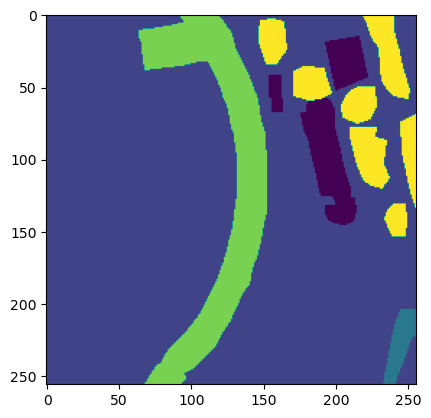

In [7]:
imshow(labels[0])

In [11]:
n_classes = len(np.unique(labels))  # water, land, roads, buildings, plants, and the unnamed.
n_classes

6

In [12]:
labels_cat = to_categorical(labels, num_classes=n_classes)
x_train, x_test, y_train, y_test = train_test_split(
    image_dataset, labels_cat,
    test_size=0.20
)

In [13]:
labels_cat.shape

(1305, 256, 256, 6)

In [9]:
BACKBONE = 'resnet34'

In [10]:
preprocess_input = sm.get_preprocessing(BACKBONE)
x_train_prepr = preprocess_input(x_train)
x_test_prepr = preprocess_input(x_test)

In [11]:
x_train_prepr.shape

(1044, 256, 256, 3)

In [26]:
y_train.shape

(1044, 256, 256, 6)

In [12]:
model = sm.Unet(
    BACKBONE,
    encoder_weights='imagenet',
    encoder_freeze=True,
    classes=n_classes,
    activation='softmax'
)

2024-02-08 22:04:39.994439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-08 22:04:39.994686: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2 Max
85521592/85521592 [==============================] - 5s 0us/step


In [14]:
model.compile(
    optimizer='Adam',
    loss=sm.losses.bce_jaccard_loss,  # intersection over union (IoU) loss
    metrics=[sm.metrics.iou_score]
)

In [15]:
model.fit(
    x_train_prepr,
    y_train,
    batch_size=2,
    epochs=20,
    verbose=1,
    validation_data=(x_test_prepr, y_test)
)

Epoch 1/20


2024-02-08 22:08:37.905781: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-08 22:08:38.916019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<2x256x256x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must

522/522 [==============================] - ETA: 0s - loss: 1.0769 - iou_score: 0.2269

2024-02-08 22:09:26.979153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<2x256x256x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<2x256x256x6xi1

522/522 [==============================] - 55s 88ms/step - loss: 1.0769 - iou_score: 0.2269 - val_loss: 1.4147 - val_iou_score: 0.0931
Epoch 2/20
522/522 [==============================] - 42s 80ms/step - loss: 0.9341 - iou_score: 0.3077 - val_loss: 1.0700 - val_iou_score: 0.1934
Epoch 3/20
111/522 [=====>........................] - ETA: 30s - loss: 0.9137 - iou_score: 0.3244

KeyboardInterrupt: 

In [17]:
model.save(os.path.join(LOCAL_DATA_PATH, 'arial_unet_weights1.hdf5'))

In [19]:
save_model(model, os.path.join(LOCAL_DATA_PATH, 'segmentation_model'))

INFO:tensorflow:Assets written to: /Users/midhuncnair/workspace/training/DeepLearningWithMidhun/Vidyadhar/data/images/segmentation/segmentation_model/assets


INFO:tensorflow:Assets written to: /Users/midhuncnair/workspace/training/DeepLearningWithMidhun/Vidyadhar/data/images/segmentation/segmentation_model/assets


In [20]:
y_pred = model.predict(x_test_prepr)

2024-02-08 22:13:00.461173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 4s 218ms/step


In [34]:
y_pred[0].shape

(256, 256, 6)

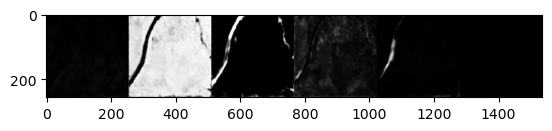

In [35]:
imgs = None
for i in range(y_pred[0].shape[-1]):
    if imgs is None:
        imgs = y_pred[0][:, :, i]
    else:
        imgs = np.hstack((imgs, y_pred[0][:, :, i]))
        
imshow(imgs)

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)
y_test_argmax = np.argmax(y_test, axis=3)

In [37]:
y_pred_argmax[0].shape

(256, 256)

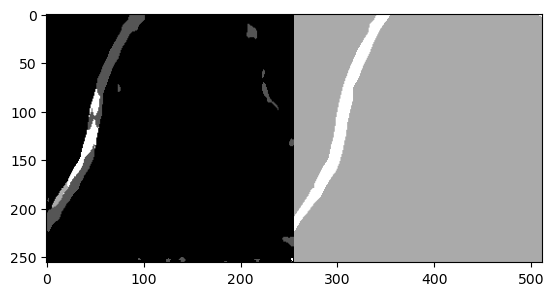

In [39]:
res_img = np.hstack((y_pred_argmax[0], y_test_argmax[0]))
imshow(res_img)

1/1 [==============================] - 0s 51ms/step
For Random Index 52
1/1 [==============================] - 0s 26ms/step
For Random Index 209
1/1 [==============================] - 0s 27ms/step
For Random Index 194
1/1 [==============================] - 0s 27ms/step
For Random Index 69
1/1 [==============================] - 0s 28ms/step


For Random Index 220


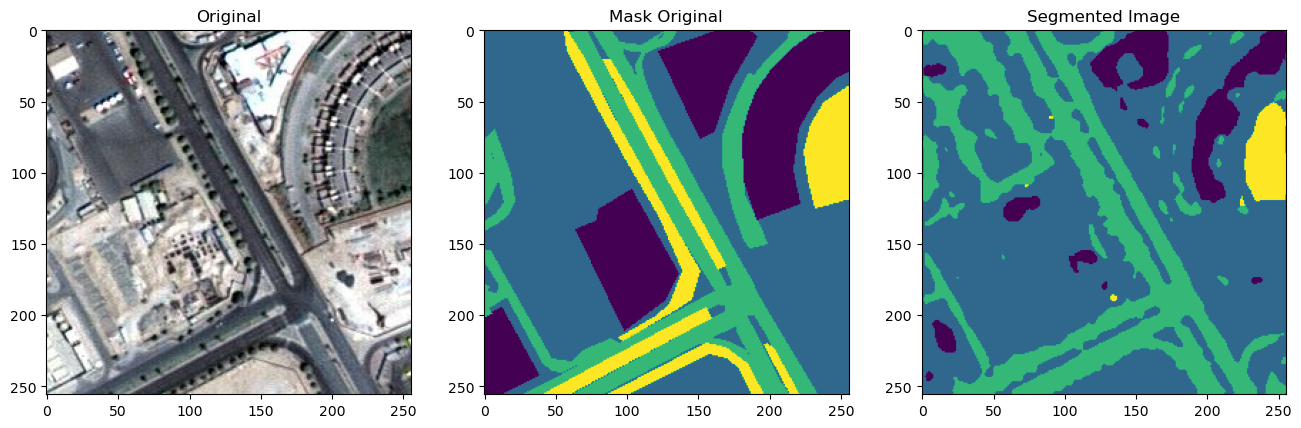

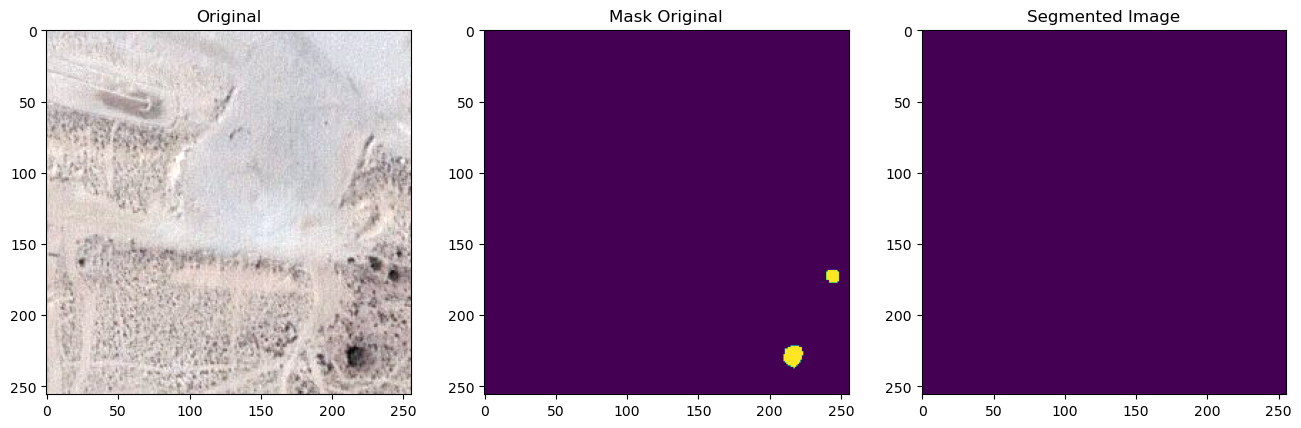

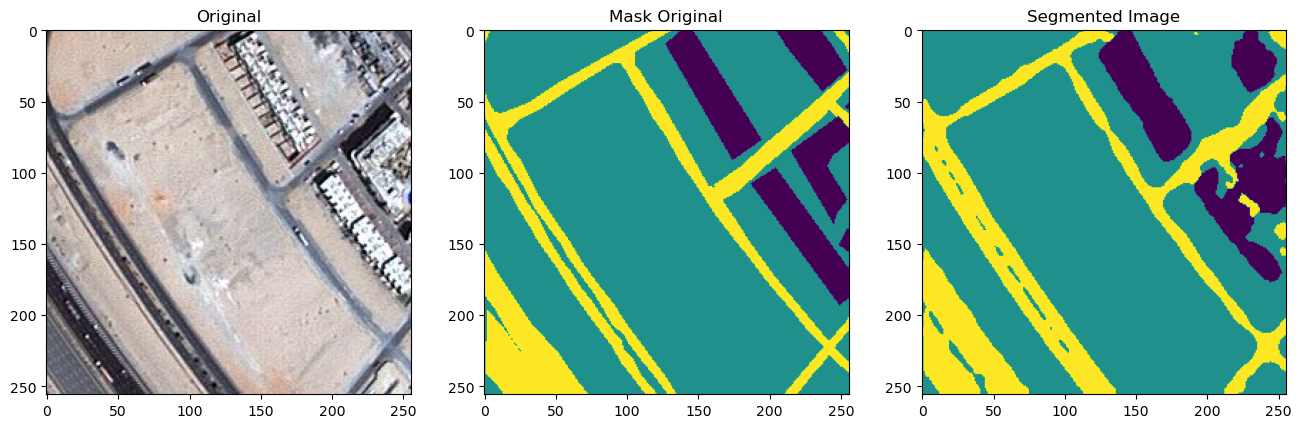

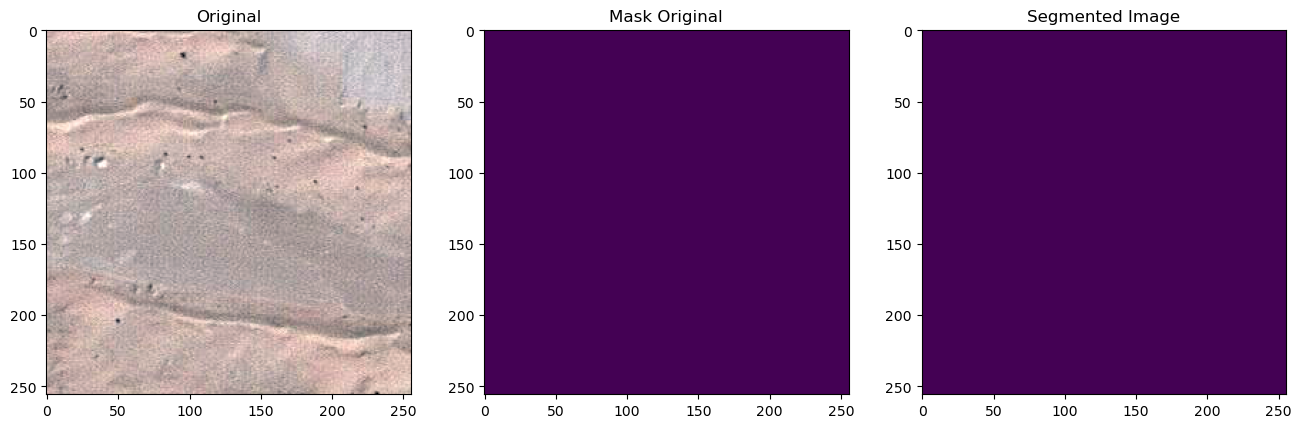

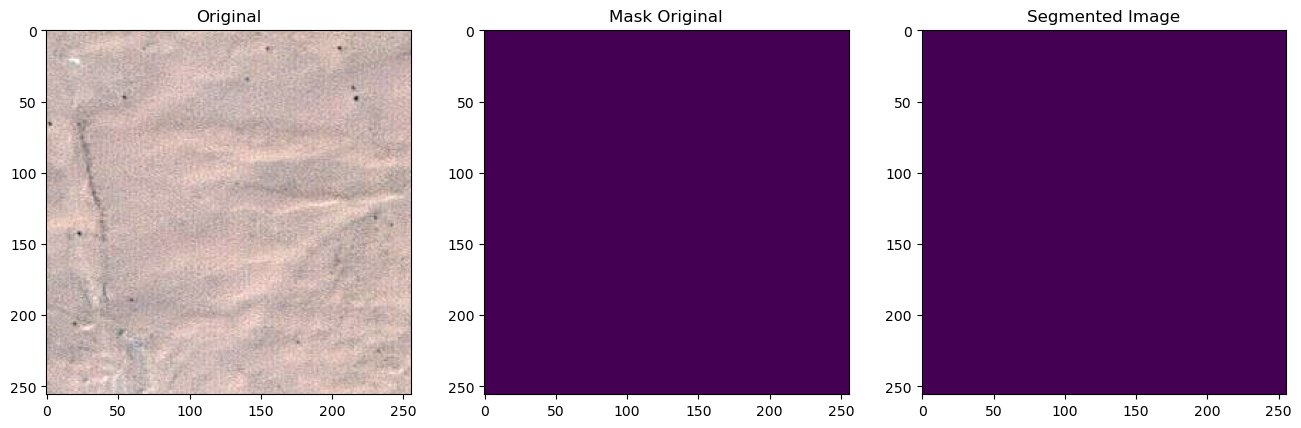

In [52]:
def test_model(model):
    test_numbers = [random.randint(0, len(x_test_prepr)) for _ in range(5)]
    for i, ind in enumerate(test_numbers, start=1):
        test_img = x_test_prepr[ind]
        ground_truth = y_test_argmax[ind]
        test_img_input = np.expand_dims(test_img, 0)
        prediction = model.predict(test_img_input)
        predicted_img = np.argmax(prediction, axis=3)[0]
        plt.figure(figsize=(16,8))
        print(f"For Random Index {ind}")
        for i in range(3):
            plt.subplot(131)
            plt.title('Original')
            plt.imshow(test_img)

            plt.subplot(132)
            plt.title('Mask Original')
            plt.imshow(ground_truth)

            plt.subplot(133)
            plt.title('Segmented Image')
            plt.imshow(predicted_img)
        
test_model(model)